In [1]:
import pydicom
from pydicom import dcmread
import os
import numpy
from os import listdir
from os.path import isfile, join
import pandas as pd
from ipywidgets import interact
import matplotlib.pyplot as plt
from PIL import Image as im
from matplotlib import pyplot, cm

In [2]:
target_folder = r"E:\Internship Mass storage\First 3 datasets\Duke_breast_MRI dataset\Duke-Breast-Cancer-MRI\Breast_MRI_002\01-01-1990-NA-MRI BREAST BILATERAL W  WO-51972\3.000000-ax t1-40797"
mypath = target_folder
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
filepaths = [target_folder + "/" + s for s in onlyfiles]
print(filepaths)

['E:\\Internship Mass storage\\First 3 datasets\\Duke_breast_MRI dataset\\Duke-Breast-Cancer-MRI\\Breast_MRI_002\\01-01-1990-NA-MRI BREAST BILATERAL W  WO-51972\\3.000000-ax t1-40797/1-01.dcm', 'E:\\Internship Mass storage\\First 3 datasets\\Duke_breast_MRI dataset\\Duke-Breast-Cancer-MRI\\Breast_MRI_002\\01-01-1990-NA-MRI BREAST BILATERAL W  WO-51972\\3.000000-ax t1-40797/1-02.dcm', 'E:\\Internship Mass storage\\First 3 datasets\\Duke_breast_MRI dataset\\Duke-Breast-Cancer-MRI\\Breast_MRI_002\\01-01-1990-NA-MRI BREAST BILATERAL W  WO-51972\\3.000000-ax t1-40797/1-03.dcm', 'E:\\Internship Mass storage\\First 3 datasets\\Duke_breast_MRI dataset\\Duke-Breast-Cancer-MRI\\Breast_MRI_002\\01-01-1990-NA-MRI BREAST BILATERAL W  WO-51972\\3.000000-ax t1-40797/1-04.dcm', 'E:\\Internship Mass storage\\First 3 datasets\\Duke_breast_MRI dataset\\Duke-Breast-Cancer-MRI\\Breast_MRI_002\\01-01-1990-NA-MRI BREAST BILATERAL W  WO-51972\\3.000000-ax t1-40797/1-05.dcm', 'E:\\Internship Mass storage\\Firs

In [3]:
from os import listdir
from os.path import isfile, join
mypath = target_folder
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
testdict = {}
sorteddict = {}
for x in onlyfiles: # for loop to make a dictionary with all the filenames
    tempfile = mypath + "/" + str(x)
    testds = dcmread(tempfile)
    position = testds.ImagePositionPatient[2]
    testdict.update({tempfile: position})

    #then put them in another dictionary ordered by z-coordinate by first retrieving the key and value for the highest value and then using a while loop to each time add the highest value to the sorted dictionary and then removing it from the first 
highestkey = max(testdict, key=testdict.get)
highestvalue = testdict[highestkey]       
while len(testdict) > 0:
    highestkey = max(testdict, key=testdict.get)
    highestvalue = testdict[highestkey]
    sorteddict.update({highestkey: highestvalue})
    testdict.pop(highestkey)

filetitles = list(sorteddict.keys())


In [34]:
# got this code from: https://gist.github.com/somada141/8dd67a02e330a657cf9e
RefDs = pydicom.read_file(filetitles[0])
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(filetitles))
print(ConstPixelDims)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))
print(ConstPixelSpacing)

(512, 512, 60)
(0.5859, 0.5859, 3.0)


In [5]:
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

In [6]:
for filenameDCM in filetitles: 
    # read the file
    ds = pydicom.read_file(filenameDCM)
    
    # store the raw image data
    ArrayDicom[:, :, filetitles.index(filenameDCM)] = ds.pixel_array

In [7]:
print(ds.pixel_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


interactive(children=(IntSlider(value=29, description='x', max=59), Output()), _dom_classes=('widget-interact'…

<function __main__.imageselector(x)>

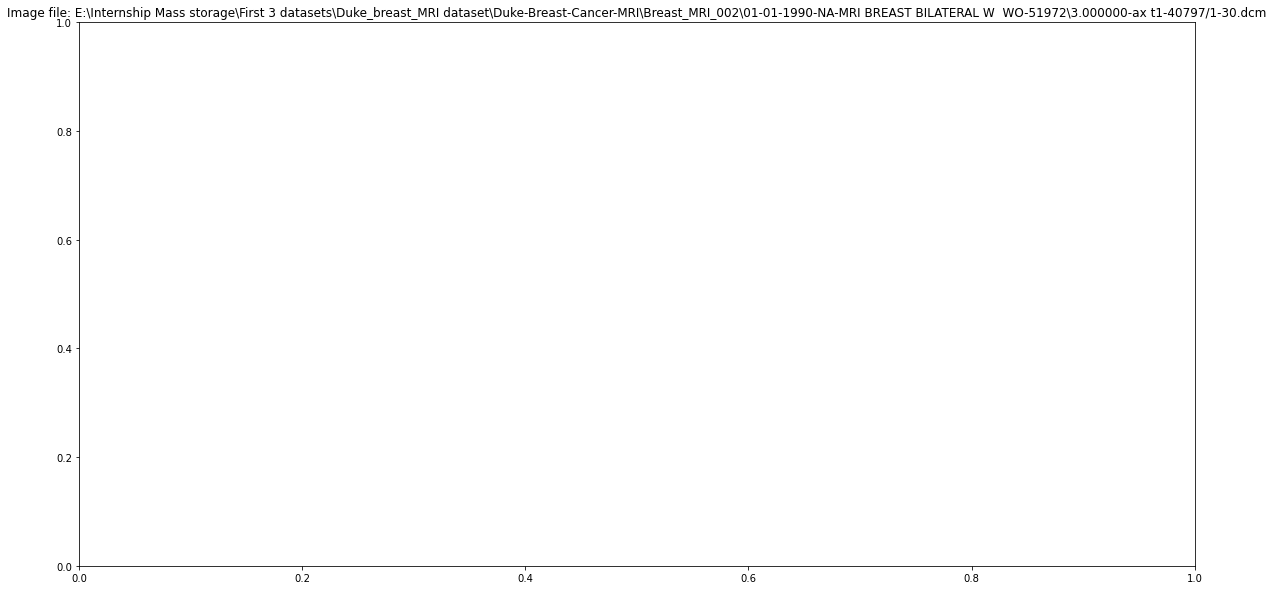

In [19]:
def show_image(slice):
    plt.imshow(ds.pixel_array[:, :, slice], cmap=plt.cm.bone)
    
n = len(sorteddict)
def imageselector(x):
    plt.figure(figsize=(20,10))
    plt.title("Image file: " + filetitles[x])
    show_image(x)
    plt.axis('off')
interact(imageselector, x = (0, n-1)) # shows only 1 image

In [42]:
x = numpy.arange(0.0, (ConstPixelDims[0]))
y = numpy.arange(0.0, (ConstPixelDims[1]))
z = numpy.arange(0.0, (ConstPixelDims[2]))
n = len(sorteddict)
def imageselector(s):
    pyplot.figure(dpi=300)
    pyplot.axes().set_aspect('equal', 'datalim')
    pyplot.set_cmap(pyplot.gray())
    pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, s]))
    print("Image file: " + filetitles[s]) #keeping this as plt.title makes the switching smoother however makes the image smaller because the titel is so big
interact(imageselector, s = (0, n-1))


interactive(children=(IntSlider(value=29, description='s', max=59), Output()), _dom_classes=('widget-interact'…

<function __main__.imageselector(s)>

In [10]:
df = pd.read_excel (r'E:\Internship Mass storage\First 3 datasets\Duke_breast_MRI dataset\Annotation_Boxes.xlsx')
print (df)

         Patient ID  Start Row  End Row  Start Column  End Column  \
0    Breast_MRI_001        234      271           308         341   
1    Breast_MRI_002        251      294           108         136   
2    Breast_MRI_003        351      412            82         139   
3    Breast_MRI_004        262      280           193         204   
4    Breast_MRI_005        188      213           138         178   
..              ...        ...      ...           ...         ...   
917  Breast_MRI_918        345      395           338         395   
918  Breast_MRI_919        285      312           369         397   
919  Breast_MRI_920        172      193           337         355   
920  Breast_MRI_921        328      374           404         446   
921  Breast_MRI_922        258      270           149         164   

     Start Slice  End Slice  
0             89        112  
1             59         72  
2             96        108  
3             86         95  
4             76     

In [11]:
test = df.iloc[1]
maskstats = pd.Series(test).values
pd.Series(test).values

array(['Breast_MRI_002', 251, 294, 108, 136, 59, 72], dtype=object)

In [26]:
ArrayMask = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

for x in range (maskstats[1],maskstats[2]):
    for y in range (maskstats[3],maskstats[4]):
        for z in range (25,40): # change this to the start/end slice if I figure out how to apply it to the slices
            ArrayMask[x,y,z] = 1


In [43]:
n = len(sorteddict)
def imageselector(s):
    pyplot.figure(dpi=300)
    pyplot.axes().set_aspect('equal', 'datalim')
    pyplot.set_cmap(pyplot.gray())
    pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, s]))
    plt.contour(ArrayMask[:, :, s])
    #print("Image file: " + filetitles[s]) #keeping this as plt.title makes the switching smoother however makes the image smaller because the titel is so big
interact(imageselector, s = (0, n-1))


interactive(children=(IntSlider(value=29, description='s', max=59), Output()), _dom_classes=('widget-interact'…

<function __main__.imageselector(s)>